# Spaceship Titanic

https://www.kaggle.com/competitions/spaceship-titanic/data

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## dataset

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 대체
from sklearn.impute import SimpleImputer
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

# 학습 데이터와 검증 데이터 나눠주기
from sklearn.model_selection import train_test_split

# 결정트리 모델을 구현한 라이브러리
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트 모델을 구현한 라이브러리
from sklearn.ensemble import RandomForestClassifier
# 부스팅을 이용한 트리모델 구현 라이브러리
from sklearn.ensemble import GradientBoostingClassifier
# 엑스트라트리모델을 구현한 라이브러리
from sklearn.ensemble import ExtraTreesClassifier
# xgboost(GBT의 병렬학습을 구현한) 라이브러리
import xgboost as xgb
# lightgbm 라이브러리
import lightgbm as lgbm

/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import glob 

glob.glob("data/spaceship-titanic/*")

['data/spaceship-titanic/test.csv',
 'data/spaceship-titanic/train.csv',
 'data/spaceship-titanic/sample_submission.csv']

In [3]:
# base path
base_path = "data/spaceship-titanic"
base_path

'data/spaceship-titanic'

In [4]:
# train
train = pd.read_csv(f"{base_path}/train.csv")
print(train.shape)
train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# test
test = pd.read_csv(f"{base_path}/test.csv")
print(test.shape)
test.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
# train, test 컬럼 비교 (target column 찾기)
set(train.columns) - set(test.columns)

{'Transported'}

In [7]:
sub = pd.read_csv("data/spaceship-titanic/sample_submission.csv")
print(sub.shape)
sub.head()

(4277, 2)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


## EDA

In [8]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
# 각 컬럼 고유값 확인
for col in train.columns:
    print(col, ":", end="")
    print(train[col].unique(), end="\n\n")

PassengerId :['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

HomePlanet :['Europa' 'Earth' 'Mars' nan]

CryoSleep :[False True nan]

Cabin :['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Destination :['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Age :[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]

VIP :[False True nan]

RoomService :[   0.  109.   43. ... 1569. 8586.  745.]

FoodCourt :[   0.    9. 3576. ... 3208. 6819. 4688.]

ShoppingMall :[   0.   25.  371. ... 1085.  510. 1872.]

Spa :[   0.  549. 6715. ... 2868. 1107. 1643.]

VRDeck :[   0.   44.   49. ... 1164.  971. 3235.]

Name :['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Honti

In [10]:
# nunique
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

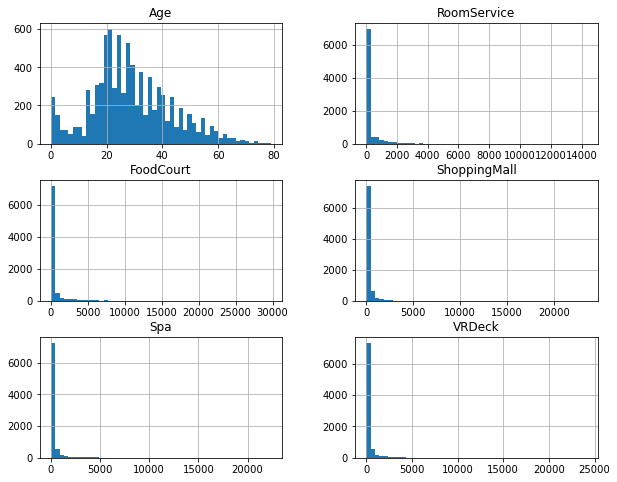

In [11]:
# hist
_ = train.hist(bins=50, figsize=(10,8))

<AxesSubplot:>

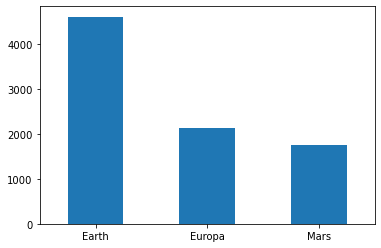

In [12]:
# HomePlanet 시각화
train["HomePlanet"].value_counts().plot(kind="bar", rot=0)

<AxesSubplot:>

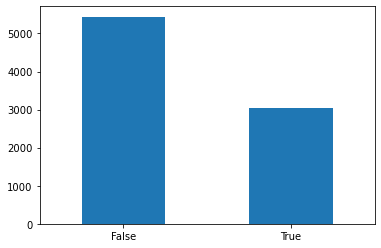

In [13]:
# CryoSleep 시각화
train["CryoSleep"].value_counts().plot(kind="bar", rot=0)

<AxesSubplot:>

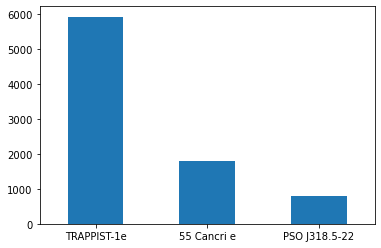

In [14]:
# Destination 시각화
train["Destination"].value_counts().plot(kind="bar", rot=0)

<AxesSubplot:>

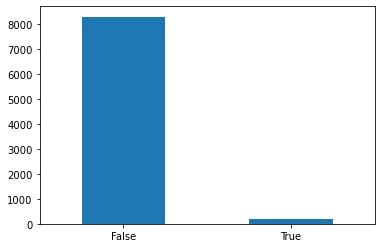

In [15]:
# VIP 시각화
train["VIP"].value_counts().plot(kind="bar", rot=0)

<AxesSubplot:>

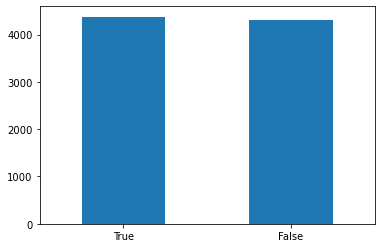

In [16]:
# Transported 시각화
train["Transported"].value_counts().plot(kind="bar",rot=0)

In [17]:
# Transported 빈도수
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [18]:
# train["Transported"] = train["Transported"].astype(int)
# train["Transported"]

In [19]:
# sub["Transported"] = sub["Transported"].astype(int)
# sub["Transported"]

In [20]:
# 결측치 확인
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [21]:
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

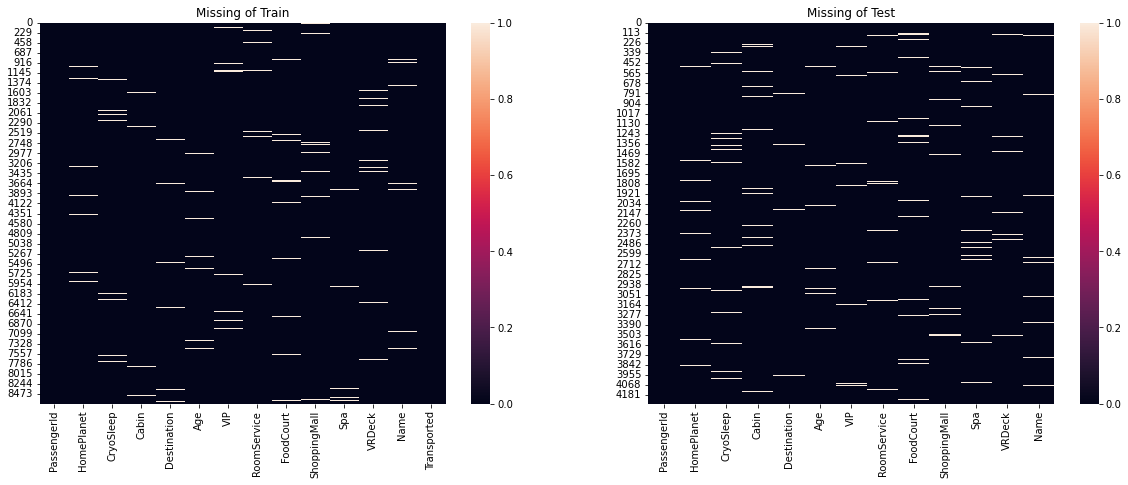

In [22]:
# 결측치 시각화
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.heatmap(train.isnull(), ax=ax[0]).set_title("Missing of Train")
sns.heatmap(test.isnull(), ax=ax[1]).set_title("Missing of Test")
plt.show()

In [23]:
# train 수치형변수 기술통계
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [24]:
# train 범주형변수 기술통계
train.describe(include="object")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [25]:
# Gollux Reedall 2명..? 동명이인임을 확인
train[train["Name"]=="Gollux Reedall"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
827,0881_01,Europa,False,D/32/S,TRAPPIST-1e,41.0,False,3103.0,3.0,0.0,31.0,26.0,Gollux Reedall,False
2852,3081_01,Europa,False,C/118/S,55 Cancri e,50.0,False,0.0,1547.0,0.0,1784.0,1.0,Gollux Reedall,True


In [26]:
# train에서 동명이인 수 확인
((train["Name"].value_counts())==2).value_counts()
# 20명!!

False    8453
True       20
Name: Name, dtype: int64

In [27]:
# test 수치형변수 기술통계
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [28]:
# test 범주형변수 기술통계
test.describe(include="object")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [29]:
# Cints Erle 2명..? -> 동명이인 인듯
test[test["Name"]=="Cints Erle"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
1445,3101_01,Mars,False,D/104/S,TRAPPIST-1e,73.0,False,1858.0,0.0,382.0,8.0,329.0,Cints Erle
2995,6576_01,Mars,True,F/1368/P,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Cints Erle


In [30]:
# test 에서 동명이인 수 확인
((test["Name"].value_counts())==2).value_counts()
# 7명!

False    4169
True        7
Name: Name, dtype: int64

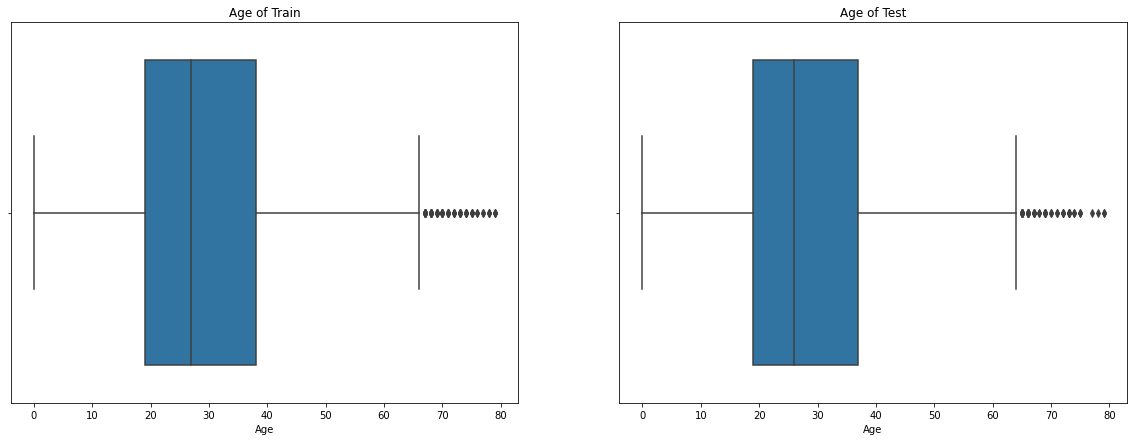

In [31]:
# Age 분포 시각화
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.boxplot(data=train, x="Age", ax=ax[0]).set_title("Age of Train")
sns.boxplot(data=test, x="Age", ax=ax[1]).set_title("Age of Test")
plt.show()

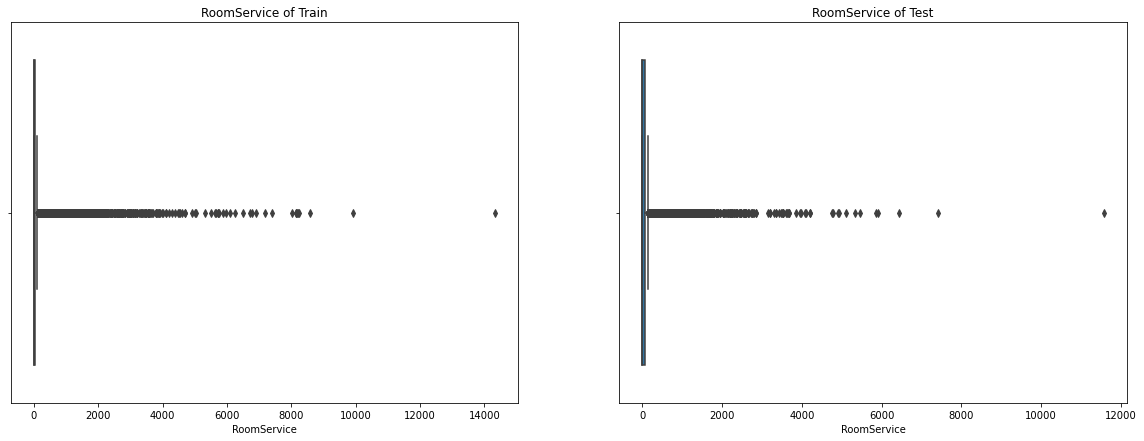

In [32]:
# RoomService 분포 시각화
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.boxplot(data=train, x="RoomService", ax=ax[0]).set_title("RoomService of Train")
sns.boxplot(data=test, x="RoomService", ax=ax[1]).set_title("RoomService of Test")
plt.show()

In [33]:
# 상관계수
corr_train = train.corr()

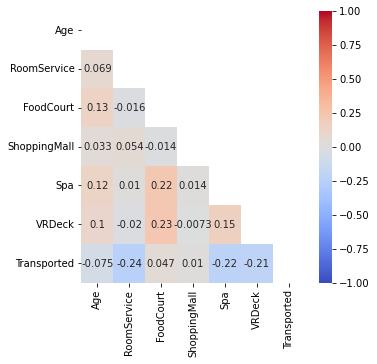

In [34]:
# 상관관계 시각화
mask = np.triu(np.ones_like(corr_train))
plt.figure(figsize=(5,5))
_ = sns.heatmap(corr_train, cmap="coolwarm", annot=True, mask=mask, vmax=1, vmin=-1)

In [35]:
corr_test = test.corr()

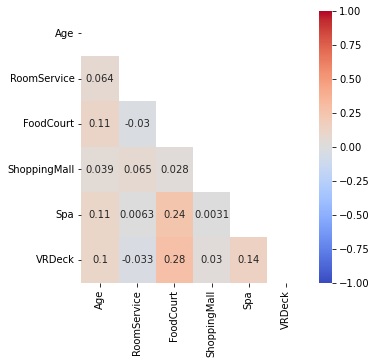

In [36]:
mask = np.triu(np.ones_like(corr_test))
plt.figure(figsize=(5,5))
_ = sns.heatmap(corr_test, cmap="coolwarm", annot=True, mask=mask, vmax=1, vmin=-1)

* 흠 근데 신기한데 FoodCourt, Roomservice, ShoppingMall, Spa, VRDeck는 강한 상관관계를 가질 줄 알았는데 거의 아무런 상관도가 나타나지 않네..

## 전처리

In [37]:
# 결측값 중앙값으로 대치
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomService"]
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

In [38]:
# 결측값 z로 대치
train["HomePlanet"].fillna("Z", inplace=True)
test["HomePlanet"].fillna("Z", inplace=True)

* 흠 이 위에 부분은 필사한 것인데 이해가 잘 가지 않음..

In [39]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

label_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] = LabelEncoder().fit_transform(test[col])
    return train, test

train , test = label_encoder(train, test, label_cols)

In [40]:
# # 27개의 모델
# from sklearn.model_selection import StratifiedKFold, train_test_split
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=False,
#                      random_state=12,
#                      classifiers='all')

# models, predictions = clf.fit(X_train , X_test , y_train , y_test)
# clear_output()

## modeling

In [41]:
#label_name
label_name = "Transported"
label_name

'Transported'

In [42]:
train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [43]:
# feature_names
feature_names = train.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("PassengerId")
feature_names.remove("Name")

feature_names

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [44]:
# Name, PassengerId 컬럼 제거
train = train.drop(["Name", "PassengerId"], axis=1)
train.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False


In [45]:
test = test.drop(["Name", "PassengerId"], axis=1)
test.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0


In [46]:
# X_train
# X_train = train[feature_names]
# X_train.shape

In [47]:
# X_test
# X_test = test[feature_names]
# X_test.shape

In [48]:
# y_train
# y_train = train[label_name]
# y_train.shape

In [49]:
X = train.drop(columns=["Transported"])
y = train["Transported"]
display(X)
display(y)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [50]:
# 학습데이터와 검증데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.9, random_state=42)

In [51]:
# 분류에서는 R2score는 아닌거 같은데 무슨 score지..?

def scoreModel(model, X_train, X_valid, y_train, y_valid):
    '''
        머신러닝 모델과 X_train, X_valid, y_train, y_valid 변수를 받아서
        모델명, 학습용 세트 정확도(R2 score), 테스트 세트 정확도(R2 score)를 출력하는 함수
    '''
    print("모델 : {}".format(model))
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    valid_score = model.score(X_valid, y_valid)
    print("검증 세트 정확도: {:.3f}".format(valid_score))
    return valid_score

### DecisionTreeClassification

In [52]:
# 모델 생성
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=4, max_features=9, random_state=42)
model_dt

DecisionTreeClassifier(max_depth=4, max_features=9, random_state=42)

In [53]:
# 모델 학습
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=9, random_state=42)

In [54]:
# 모델 점수 산출
score = scoreModel(model_dt, X_train, X_valid, y_train, y_valid)

모델 : DecisionTreeClassifier(max_depth=4, max_features=9, random_state=42)
학습용 세트 정확도: 0.746
검증 세트 정확도: 0.721


In [55]:
# 예측값 확인
prediction_dt = model_dt.predict(test)
prediction_dt

array([ True, False,  True, ...,  True,  True,  True])

In [56]:
# sub 확인
sub["Transported"] = prediction_dt
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [57]:
# csv 파일 저장
file_name = f"data/spaceship-titanic/sub_dt_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### RandomForestClassification

In [58]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, max_depth=3,
                                  max_features=0.9, random_state=42)
model_rf

RandomForestClassifier(max_depth=3, max_features=0.9, n_estimators=1000,
                       random_state=42)

In [59]:
# 모델 학습
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=0.9, n_estimators=1000,
                       random_state=42)

In [60]:
# 모델에 대한 점수 산출
score = scoreModel(model_rf, X_train, X_valid, y_train, y_valid)

모델 : RandomForestClassifier(max_depth=3, max_features=0.9, n_estimators=1000,
                       random_state=42)
학습용 세트 정확도: 0.766
검증 세트 정확도: 0.748


In [61]:
# 예측값 확인
prediction_rf = model_rf.predict(test)
prediction_rf

array([ True, False,  True, ...,  True,  True,  True])

In [62]:
# sub 확인
sub["Transported"] = prediction_rf
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [63]:
# csv 파일 저장
file_name = f"data/spaceship-titanic/sub_rf_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### GBT

In [64]:
# 모델 생성
from sklearn.ensemble import GradientBoostingClassifier

model_gbt = GradientBoostingClassifier(random_state=42)
model_gbt

GradientBoostingClassifier(random_state=42)

In [65]:
# 모델 학습
model_gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [66]:
# 모델에 대한 점수 산출
score = scoreModel(model_gbt, X_train, X_valid, y_train, y_valid)

모델 : GradientBoostingClassifier(random_state=42)
학습용 세트 정확도: 0.822
검증 세트 정확도: 0.787


In [67]:
# 예측값 확인
prediction_gbt = model_gbt.predict(test)
prediction_gbt

array([ True, False,  True, ...,  True,  True,  True])

In [68]:
# sub 확인
sub["Transported"] = prediction_gbt
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [69]:
# 파일 저장
file_name = f"data/spaceship-titanic/sub_gbt_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### ExtraTree Model

In [70]:
# 모델 생성
from sklearn.ensemble import ExtraTreesClassifier

model_et = ExtraTreesClassifier(random_state=42, max_depth = 3, max_features=0.9)
model_et

ExtraTreesClassifier(max_depth=3, max_features=0.9, random_state=42)

In [71]:
# 모델 학습
model_et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=3, max_features=0.9, random_state=42)

In [72]:
# 스코어 산출
score = scoreModel(model_et, X_train, X_valid, y_train, y_valid)

모델 : ExtraTreesClassifier(max_depth=3, max_features=0.9, random_state=42)
학습용 세트 정확도: 0.721
검증 세트 정확도: 0.701


In [73]:
# 모델 예측값 확인
prediction_et = model_et.predict(test)
prediction_et

array([ True, False,  True, ...,  True, False,  True])

In [74]:
# sub
sub["Transported"]=prediction_et
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [75]:
# 파일 저장
file_name = f"data/spaceship-titanic/sub_et_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


### XGBoost

In [76]:
# xgboost 분류모델 생성
import xgboost as xgb

model_xgb = xgb.XGBRFClassifier(random_State=42, learning_rate=0.05, verbosity=0)
model_xgb

XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bytree=None, enable_categorical=False, gamma=None,
                gpu_id=None, importance_type=None, interaction_constraints=None,
                learning_rate=0.05, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_State=42,
                random_state=None, reg_alpha=None, scale_pos_weight=None,
                tree_method=None, validate_parameters=None, verbosity=0)

In [77]:
# 모델 학습
model_xgb.fit(X_train, y_train)

/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_State=42,
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

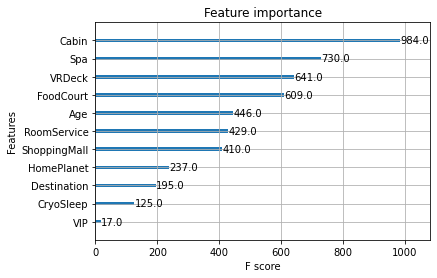

In [78]:
# feature 중요도 시각화
xgb.plot_importance(model_xgb)

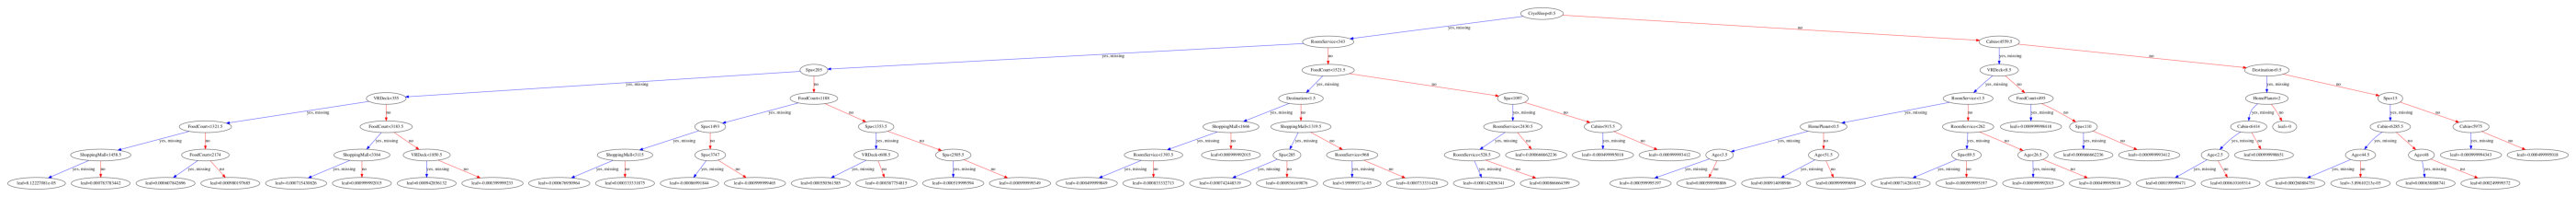

In [79]:
# tree tlrkrghk
xgb.plot_tree(model_xgb, num_tree=1)
fig = plt.gcf()
fig.set_size_inches(50,50)

In [80]:
# 모델에 대한 점수 산출
score = scoreModel(model_xgb, X_train, X_valid, y_train, y_valid)
score

모델 : XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_State=42,
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=0)
학습용 세트 정확도: 0.811
검증 세트 정확도: 0.782


/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.7816091954022989

In [81]:
# 예측값 확인
prediction_xgb = model_xgb.predict(test)
prediction_xgb

/Users/kwonsojung/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([ True, False,  True, ...,  True,  True,  True])

In [82]:
# sub
sub["Transported"] = prediction_xgb
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [83]:
# 파일 저장
file_name = f"data/spaceship-titanic/sub_xgb_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### LGBM

In [84]:
# 모델 생성
import lightgbm as lgbm

model_lgbm = lgbm.LGBMClassifier(learning_rate=0.01, max_depth = 3,
                                 random_state=42, n_estimators=1000)
model_lgbm

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)

In [85]:
# 모델 학습
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

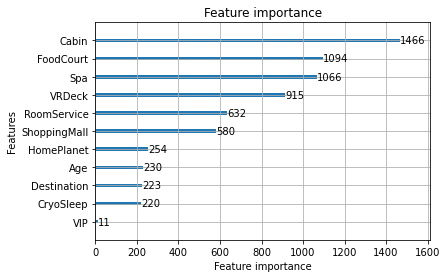

In [86]:
# feature 중요도 시각화
lgbm.plot_importance(model_lgbm)

<AxesSubplot:>

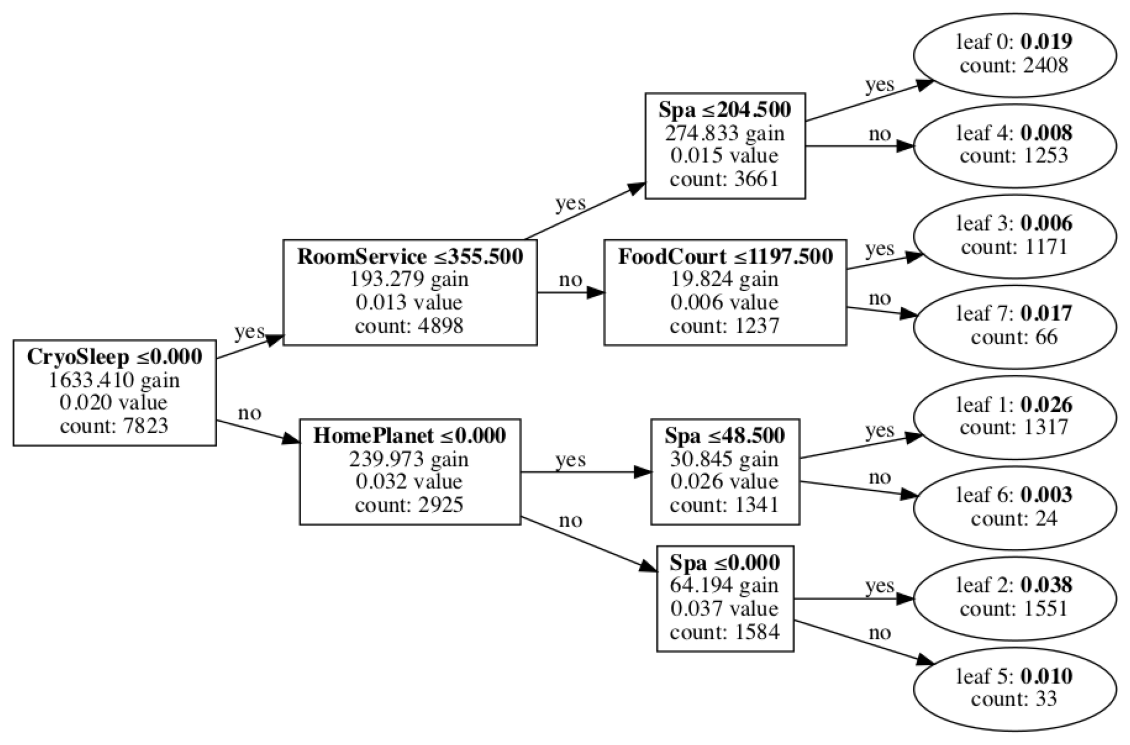

In [87]:
lgbm.plot_tree(model_lgbm, figsize=(20, 20), tree_index=0, 
               show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])

In [88]:
# 모델에 대한 score 산출
score = scoreModel(model_lgbm, X_train, X_valid, y_train, y_valid)

모델 : LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)
학습용 세트 정확도: 0.817
검증 세트 정확도: 0.785


In [89]:
# 예측값 확인
prediction_lgbm = model_lgbm.predict(test)
prediction_lgbm

array([ True, False,  True, ...,  True,  True,  True])

In [90]:
# sub
sub["Transported"] = prediction_lgbm
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [91]:
# 파일 저장
file_name = f"data/spaceship-titanic/sub_lgbm_{score}.csv"
sub.to_csv(file_name , index=False)
pd.read_csv(file_name)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
